# AED - Análise Exploratória de Dados RH2M (Relative Humidity - Umidade Relativa) - Horário

## 1. Carregamento e Preparação dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("rh_hours.csv", dtype={"timestamp": str})
# Formato: YYYYMMDDHH
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H")
df = df.set_index("timestamp").sort_index()

df.head()

,rh2m
timestamp,
2025-09-30 00:00:00,63.08
2025-09-30 01:00:00,71.68
2025-09-30 02:00:00,79.96
2025-09-30 03:00:00,84.48
2025-09-30 04:00:00,86.18


## 2. Visualização Temporal

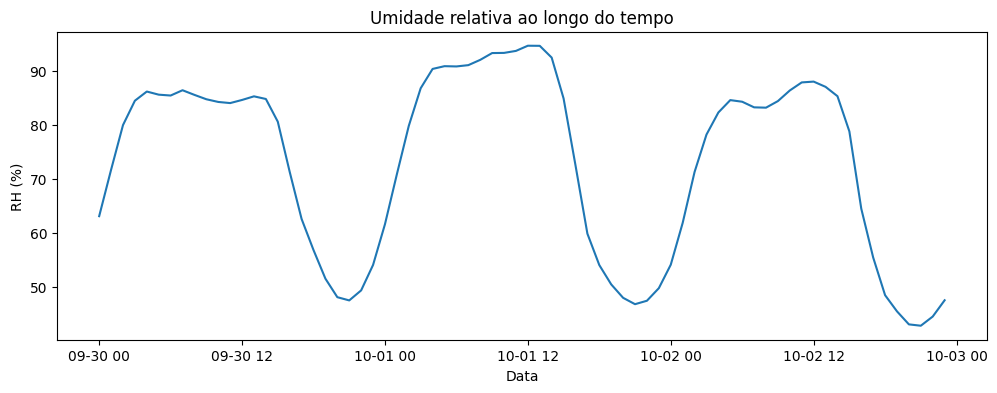

In [2]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['rh2m'])
plt.title('Umidade relativa ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('RH (%)')
plt.show()

## 3. Estatísticas Descritivas e Qualidade dos Dados

In [3]:
print(df['rh2m'].describe())
print("\nNulos:", df.isna().sum())

count    72.000000
mean     73.057778
std      16.992532
min      42.780000
25%      55.085000
50%      81.445000
75%      85.745000
max      94.670000
Name: rh2m, dtype: float64

Nulos: rh2m    0
dtype: int64


## 4. Análise de Intervalos entre Observações

timestamp
0 days 01:00:00    71
Name: count, dtype: int64


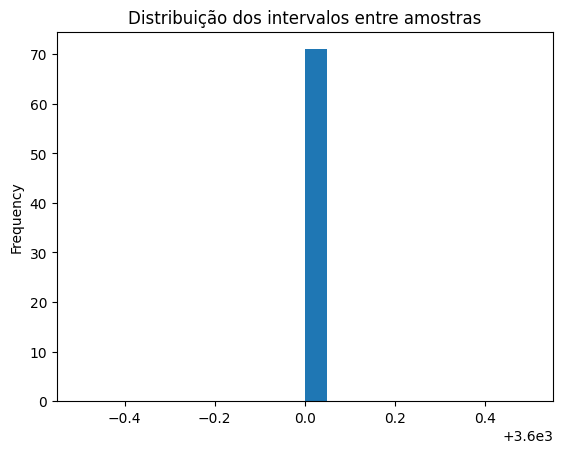

In [4]:
intervalos = df.index.to_series().diff().dropna()
print(intervalos.value_counts().head())

intervalos.dt.total_seconds().plot(kind='hist', bins=20, title='Distribuição dos intervalos entre amostras')
plt.show()

## 5. Decomposição Sazonal (Período 24h)

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['rh2m'], model='additive', period=24)
result.plot()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

## 6. Teste de Estacionariedade (ADF)

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['rh2m'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

## 7. ACF e PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['rh2m'], lags=50)
plt.show()

plot_pacf(df['rh2m'], lags=50)
plt.show()

## 8. Padrão Horário (Média por Hora do Dia)

In [ ]:
df_tmp = df.copy()
df_tmp['hour'] = df_tmp.index.hour

plt.figure(figsize=(10,4))
df_tmp.groupby('hour')['rh2m'].mean().plot(kind='bar')
plt.title('Umidade relativa média por hora do dia')
plt.xlabel('Hora')
plt.ylabel('%')
plt.tight_layout()
plt.show()

## Conclusão

A série apresenta sazonalidade diária bem definida (período de 24 horas). Os testes de estacionariedade e as visualizações ACF/PACF fornecem insights sobre a estrutura temporal dos dados de umidade relativa.